# matplitlib结合web技术

现今的数据可视化早已不再局限于文章或者出个图就算了,更多的需要使用web技术动态的构建图像,使用web技术做数据可视化当然可以在前端做,比如结合d3.js实现,但如果要从后端生成,我们也可以使用matplotlib来实现.

matplotlib的web端使用的绘图技术有两种

+ 基于svg图像标签`<SVG>`的图像技术

+ 基于websocket的图像技术

根据实现也分为展示型和交互型,一般来说,交互型就会用到ajax技术,轮询,或者websocket了


当然了,对于生成的动画,也是可以结合web技术实现展示的

我们这次的来以股票数据作为例子来绘制图形,用来查看上证50股的历史k线图

上证50成分股内容如下

```
symbol_dict = {
    "600000": "浦发银行",
    "600010": "包钢股份",
    "600015": "华夏银行",
    "600016": "民生银行",
    "600018": "上港集团",
    "600028": "中国石化",
    "600030": "中信证券",
    "600036": "招商银行",
    "600048": "保利地产",
    "600050": "中国联通",
    "600089": "特变电工",
    "600104": "上汽集团",
    "600109": "国金证券",
    "600111": "北方稀土",
    "600150": "中国船舶",
    "600256": "广汇能源",
    "600406": "国电南瑞",
    "600518": "康美药业",
    "600519": "贵州茅台",
    "600583": "海油工程",
    "600585": "海螺水泥",
    "600637": "东方明珠",
    "600690": "青岛海尔",
    "600837": "海通证券",
    "600887": "伊利股份",
    "600893": "中航动力",
    "600958": "东方证券",
    "600999": "招商证券",
    "601006": "大秦铁路",
    "601088": "中国神华",
    "601166": "兴业银行",
    "601169": "北京银行",
    "601186": "中国铁建",
    "601288": "农业银行",
    "601318": "中国平安",
    "601328": "交通银行",
    "601390": "中国中铁",
    "601398": "工商银行",
    "601601": "中国太保",
    "601628": "中国人寿",
    "601668": "中国建筑",
    "601688": "华泰证券",
    "601766": "中国中车",
    "601800": "中国交建",
    "601818": "光大银行",
    "601857": "中国石油",
    "601901": "方正证券",
    "601988": "中国银行",
    "601989": "中国重工",
    "601998": "中信银行"}
```

我们通过输入编号和日期来进行查找

下面是基本的函数

In [1]:
from __future__ import print_function
from imp import reload
import matplotlib
reload(matplotlib)

matplotlib.use('nbagg')

import matplotlib.backends.backend_nbagg
reload(matplotlib.backends.backend_nbagg)
import matplotlib.backends.backend_webagg_core
reload(matplotlib.backends.backend_webagg_core)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.interactive(False)

from matplotlib.finance import quotes_historical_yahoo_ochl
from matplotlib.finance import candlestick_ochl
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter  ,WeekdayLocator,MONDAY,DayLocator
import datetime  
import numpy as np

In [2]:
symbol_dict = {
    "600000": u"浦发银行",
    "600010": u"包钢股份",
    "600015": u"华夏银行",
    "600016": u"民生银行",
    "600018": u"上港集团",
    "600028": u"中国石化",
    "600030": u"中信证券",
    "600036": u"招商银行",
    "600048": u"保利地产",
    "600050": u"中国联通",
    "600089": u"特变电工",
    "600104": u"上汽集团",
    "600109": u"国金证券",
    "600111": u"北方稀土",
    "600150": u"中国船舶",
    "600256": u"广汇能源",
    "600406": u"国电南瑞",
    "600518": u"康美药业",
    "600519": u"贵州茅台",
    "600583": u"海油工程",
    "600585": u"海螺水泥",
    "600637": u"东方明珠",
    "600690": u"青岛海尔",
    "600837": u"海通证券",
    "600887": u"伊利股份",
    "600893": u"中航动力",
    "600958": u"东方证券",
    "600999": u"招商证券",
    "601006": u"大秦铁路",
    "601088": u"中国神华",
    "601166": u"兴业银行",
    "601169": u"北京银行",
    "601186": u"中国铁建",
    "601288": u"农业银行",
    "601318": u"中国平安",
    "601328": u"交通银行",
    "601390": u"中国中铁",
    "601398": u"工商银行",
    "601601": u"中国太保",
    "601628": u"中国人寿",
    "601668": u"中国建筑",
    "601688": u"华泰证券",
    "601766": u"中国中车",
    "601800": u"中国交建",
    "601818": u"光大银行",
    "601857": u"中国石油",
    "601901": u"方正证券",
    "601988": u"中国银行",
    "601989": u"中国重工",
    "601998": u"中信银行"
}

In [3]:
plt.style.use('chinese_support')

In [5]:
def draw_k(id_str,from_date_str,to_date_str):
    
    #设置x轴坐标刻度
    mondays = WeekdayLocator(MONDAY)            # 主要刻度
    alldays = DayLocator()                      # 次要刻度

    mondayFormatter = DateFormatter('%m-%d-%Y') # 如：2-29-2015
    dayFormatter = DateFormatter('%d') 
    
    from_date = tuple((int(i) for i in from_date_str.strip().split("-")))

    to_date = tuple((int(i) for i in to_date_str.strip().split("-")))
    quotes_ochl = quotes_historical_yahoo_ochl(id_str+'.ss', from_date ,to_date)
    
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)

    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(mondayFormatter)


    candlestick_ochl(ax, quotes_ochl, width=0.6, colorup='r', colordown='g')
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    ax.grid(True)
    plt.title(symbol_dict.get(id_str,u"未知"))
    plt.show()

<IPython.core.display.Javascript object>


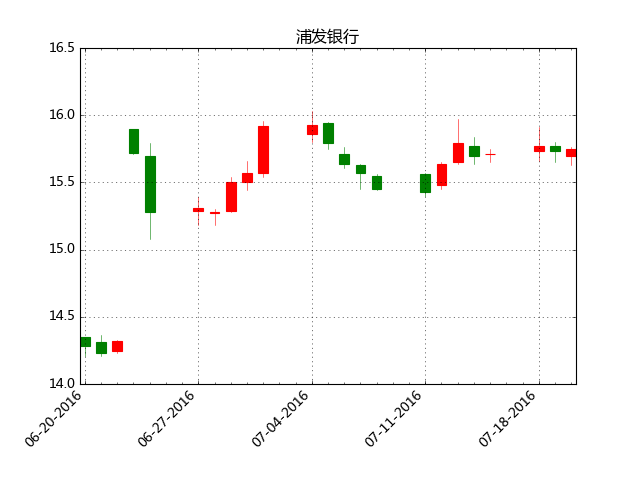

In [6]:
draw_k('600000','2016-6-20','2016-7-20')

## 基于SVG的展示型图像


一种方式是将svg图像写入一个伪造的文件,然后将其取出,把头部修改了,这样就可以直接用了


In [7]:
from pyquery import PyQuery as Q
from io import BytesIO
import json

In [8]:
def deal_with_svg(f):
    # Create XML tree from the SVG file.
    value = f.getvalue()
    # Add attributes to the patch objects.
    
    # Add a transition effect
    result = Q(value)
    return result.__str__()

In [9]:
def draw_k_svg(id_str,from_date_str,to_date_str):
    
    #设置x轴坐标刻度
    mondays = WeekdayLocator(MONDAY)            # 主要刻度
    alldays = DayLocator()                      # 次要刻度

    mondayFormatter = DateFormatter('%m-%d-%Y') # 如：2-29-2015
    dayFormatter = DateFormatter('%d') 
    
    from_date = tuple((int(i) for i in from_date_str.strip().split("-"))) 
    to_date = tuple((int(i) for i in to_date_str.strip().split("-")))
    quotes_ochl = quotes_historical_yahoo_ochl(id_str+'.ss', from_date ,to_date)
    
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)

    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(mondayFormatter)


    candlestick_ochl(ax, quotes_ochl, width=0.6, colorup='r', colordown='g')
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    ax.grid(True)
    plt.title(symbol_dict.get(id_str,u"未知"))
    
    f = BytesIO()
    plt.savefig(f, format="svg")
    return deal_with_svg(f)

In [10]:
from IPython.display import HTML

In [11]:
HTML(draw_k_svg('600000','2016-6-20','2016-7-20'))

样例代码可以在这里看到

## 基于websocket的绘图技术


通过这种方式可以提供交互,把图片连同工具栏一起发送到客户端,具体的方法可以看样例代码,这边提供了2种样例代码,分别使用:

+ [tornado](https://github.com/hsz1273327/matplotlib_for_visualization/blob/master/ipynbs/src/webtech/canvas_websocket/simpleApp_tornado.py)

+ [flask+gevent-websocket](https://github.com/hsz1273327/matplotlib_for_visualization/blob/master/ipynbs/src/webtech/canvas_websocket/simpleApp.py)

## 使用`.to_html5_video()`直接输出动画

在支持html5的的浏览器上完全可以直接用`.to_html5_video()`来获得可以输出视频

In [13]:
from matplotlib.animation import FuncAnimation


def rain():

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0, 0, 1, 1], frameon=False)
    ax.set_xlim(0, 1), ax.set_xticks([])
    ax.set_ylim(0, 1), ax.set_yticks([])

    # Create rain data
    n_drops = 50
    rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                          ('size',     float, 1),
                                          ('growth',   float, 1),
                                          ('color',    float, 4)])

    # Initialize the raindrops in random positions and with
    # random growth rates.
    rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
    rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

    # Construct the scatter which we will update during animation
    # as the raindrops develop.
    scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                      s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                      facecolors='none')


    def update(frame_number):
        # Get an index which we can use to re-spawn the oldest raindrop.
        current_index = frame_number % n_drops

        # Make all colors more transparent as time progresses.
        rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
        rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

        # Make all circles bigger.
        rain_drops['size'] += rain_drops['growth']

        # Pick a new position for oldest rain drop, resetting its size,
        # color and growth factor.
        rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
        rain_drops['size'][current_index] = 5
        rain_drops['color'][current_index] = (0, 0, 0, 1)
        rain_drops['growth'][current_index] = np.random.uniform(50, 200)

        # Update the scatter collection, with the new colors, sizes and positions.
        scat.set_edgecolors(rain_drops['color'])
        scat.set_sizes(rain_drops['size'])
        scat.set_offsets(rain_drops['position'])


    # Construct the animation, using the update function as the animation
    # director.
    animation = FuncAnimation(fig, update, interval=10)
    return animation.to_html5_video()

In [14]:
HTML(rain())

## 使用gif图片嵌入img输出动画

我们也可以用类似svg嵌入网页的方式嵌入gif

In [15]:

from numpy import sin, cos
import scipy.integrate as integrate
import matplotlib.animation as animation

plt.style.use("animation_support")

import os
import base64
import time


def double_pendulum():
    G = 9.8  # acceleration due to gravity, in m/s^2
    L1 = 1.0  # length of pendulum 1 in m
    L2 = 1.0  # length of pendulum 2 in m
    M1 = 1.0  # mass of pendulum 1 in kg
    M2 = 1.0  # mass of pendul
    def derivs(state, t):

        dydx = np.zeros_like(state)
        dydx[0] = state[1]

        del_ = state[2] - state[0]
        den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
        dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
                   M2*G*sin(state[2])*cos(del_) +
                   M2*L2*state[3]*state[3]*sin(del_) -
                   (M1 + M2)*G*sin(state[0]))/den1

        dydx[2] = state[3]

        den2 = (L2/L1)*den1
        dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
                   (M1 + M2)*G*sin(state[0])*cos(del_) -
                   (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
                   (M1 + M2)*G*sin(state[2]))/den2

        return dydx

    # create a time array from 0..100 sampled at 0.05 second steps
    dt = 0.05
    t = np.arange(0.0, 20, dt)

    # th1 and th2 are the initial angles (degrees)
    # w10 and w20 are the initial angular velocities (degrees per second)
    th1 = 120.0
    w1 = 0.0
    th2 = -10.0
    w2 = 0.0

    # initial state
    state = np.radians([th1, w1, th2, w2])

    # integrate your ODE using scipy.integrate.
    y = integrate.odeint(derivs, state, t)

    x1 = L1*sin(y[:, 0])
    y1 = -L1*cos(y[:, 0])

    x2 = L2*sin(y[:, 2]) + x1
    y2 = -L2*cos(y[:, 2]) + y1

    fig = plt.figure()
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
    ax.grid()

    line, = ax.plot([], [], 'o-', lw=2)
    time_template = 'time = %.1fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


    def init():
        line.set_data([], [])
        time_text.set_text('')
        return line, time_text


    def animate(i):
        thisx = [0, x1[i], x2[i]]
        thisy = [0, y1[i], y2[i]]

        line.set_data(thisx, thisy)
        time_text.set_text(time_template % (i*dt))
        return line, time_text

    ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                                  interval=25, blit=True, init_func=init)
    
    timestmp = time.time()
    ani.save("{stmp}_temp.gif".format(stmp=timestmp), writer='imagemagick',codec="gif",fps=15)
    with open("{stmp}_temp.gif".format(stmp=timestmp),"rb") as f:
        value = base64.b64encode(f.read()).decode()
    os.remove("{stmp}_temp.gif".format(stmp=timestmp))
    result = '<img src="data:image/gif;base64,{value}" />'.format(value=value)
    return result


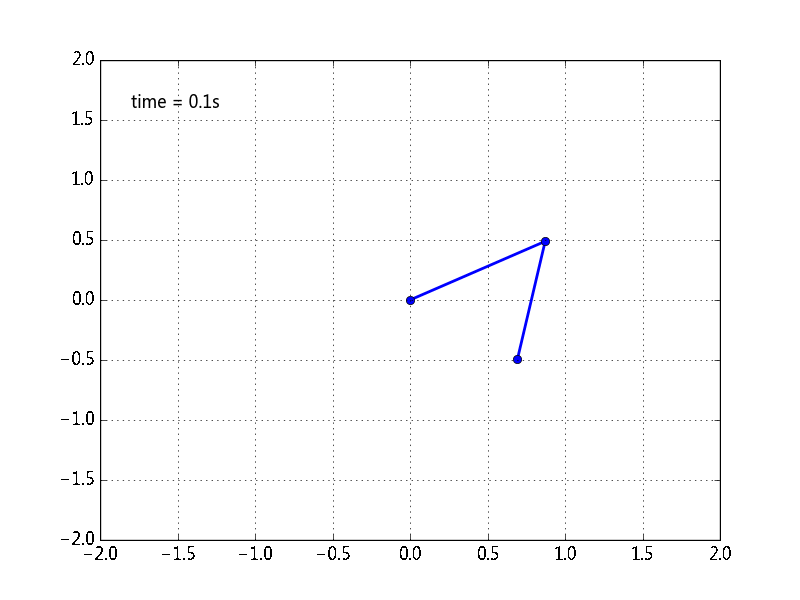

In [16]:
HTML(double_pendulum())

这种方式最好不要用,很慢